In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some synthetic data
random.seed(42)
area = [2 * random.random() for _ in range(100)]  # Random area values
bedrooms = [random.randint(1, 4) for _ in range(100)]  # Random number of bedrooms between 1 and 4
X = [[1, area[i], bedrooms[i]] for i in range(100)]  # Add x0 = 1 for the intercept term
y = [50 + 200 * area[i] + 100 * bedrooms[i] + random.gauss(0, 50) for i in range(100)]  # House price with some noise

# Initialize parameters
learning_rate = 0.1
n_iterations = 50
m = len(X)
theta = [random.random() for _ in range(3)]  # We have 3 parameters: intercept, area, and bedrooms

# Define the cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    total_cost = 0
    for i in range(m):
        prediction = sum(theta[j] * X[i][j] for j in range(len(theta)))
        total_cost += (prediction - y[i]) ** 2
    return total_cost / (2 * m)

# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    m = len(y)
    cost_history = []
    
    for iteration in range(n_iterations):
        gradients = [0] * len(theta)
        for i in range(m):
            prediction = sum(theta[j] * X[i][j] for j in range(len(theta)))
            for j in range(len(theta)):
                gradients[j] += (prediction - y[i]) * X[i][j]
        
        for j in range(len(theta)):
            theta[j] -= (learning_rate / m) * gradients[j]
        
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

Theta found by gradient descent: [42.113705101072576, 205.027604251063, 104.14720849098758]
Final cost: 1175.339733932665
Predicted price of the house: 662.0967369506299


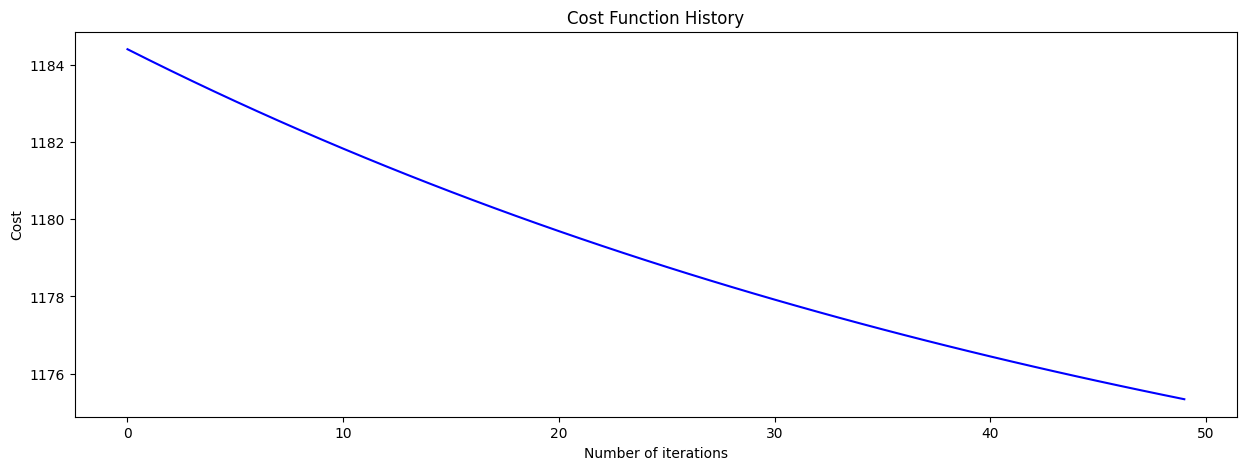

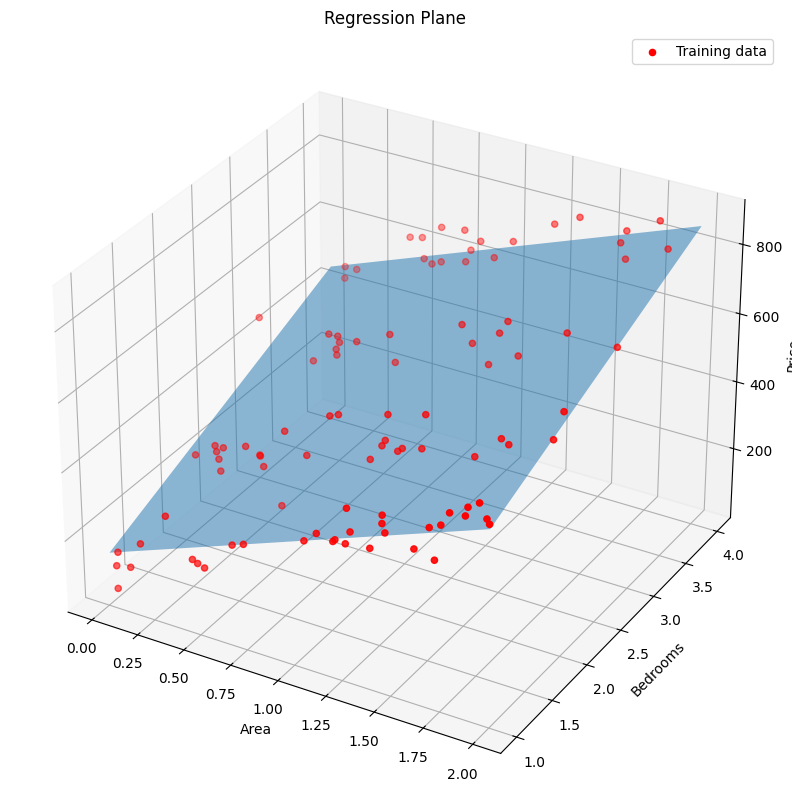

In [8]:
# Run gradient descent
theta, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

# Output the results
print("Theta found by gradient descent:", theta)
print("Final cost:", cost_history[-1])

# Predictions
def predict(X, theta):
    return sum(theta[j] * X[j] for j in range(len(theta)))

# Predicting the price of a house with area=1.5 and 3 bedrooms
new_house = [1, 1.5, 3]  # Including the bias term
predicted_price = predict(new_house, theta)
print("Predicted price of the house:", predicted_price)

# Visualization

# Plotting the cost function history
plt.figure(figsize=(15, 5))
plt.plot(range(n_iterations), cost_history, 'b-')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.title('Cost Function History')
plt.show()

# Plotting the regression plane
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(area, bedrooms, y, c='r', marker='o', label='Training data')

# Create a grid to plot the plane
area_grid, bedrooms_grid = np.meshgrid(np.linspace(min(area), max(area), 20), np.linspace(min(bedrooms), max(bedrooms), 20))
prices_grid = theta[0] + theta[1] * area_grid + theta[2] * bedrooms_grid

# Plot the plane
ax.plot_surface(area_grid, bedrooms_grid, prices_grid, alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('Area')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Regression Plane')
plt.legend()
plt.show()